<a href="https://colab.research.google.com/github/Ronit-Pai/Lung-Cancer-Classification/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,f1_score,matthews_corrcoef,roc_auc_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

train_data = pd.read_csv("survey lung cancer.csv")


train_data = train_data.dropna()


X_train = train_data.drop('LUNG_CANCER', axis=1)
y_train = train_data['LUNG_CANCER']


X_train = pd.get_dummies(X_train, drop_first=True)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


new_data = pd.read_csv("predict_data.csv")


new_data = new_data.fillna(0)


X_new = pd.get_dummies(new_data, drop_first=True)


X_new = X_new.reindex(columns=X_train.columns, fill_value=0)


predictions = model.predict(X_new)


new_data['predicted_lung_cancer'] = predictions


print(new_data)
new_data.to_csv("predictions_random_forest.csv", index=False)

predictions = pd.read_csv("predictions_random_forest.csv")
original = pd.read_csv("survey lung cancer.csv")


merged = pd.merge(
    predictions,
    original,
    on=["GENDER", "AGE", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE",
        "CHRONIC DISEASE", "FATIGUE ", "ALLERGY ", "WHEEZING", "ALCOHOL CONSUMING",
        "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"],
    suffixes=('_predicted', '_true')
)


correct = (merged['predicted_lung_cancer'] == merged['LUNG_CANCER']).sum()
total = len(merged)
accuracy = (correct / total) * 100

print(f"Accuracy: {accuracy:.2f}%")

pred_df = pd.read_csv("predictions_random_forest.csv")
pred_df["predicted_lung_cancer"] = pred_df["predicted_lung_cancer"].map({"YES": 1, "NO": 0})
pred_labels = pred_df["predicted_lung_cancer"]
true_labels = train_data["LUNG_CANCER"].map({"YES": 1, "NO": 0})

precision_scr = precision_score(true_labels, pred_labels)
print("Precision score:", precision_scr)

f1_scr = f1_score(true_labels,pred_labels)
print("F1 score:", f1_scr)

mcc = matthews_corrcoef(true_labels, pred_labels)
print("MCC score:", mcc)

auroc_scr = roc_auc_score(true_labels, pred_labels)
print("AUROC score:", auroc_scr)

recall_scr = recall_score(true_labels, pred_labels)
print("recall score:",recall_scr)


    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

**Confusion Matrix **


Confusion Matrix:
[[ 38   1]
 [  0 270]]


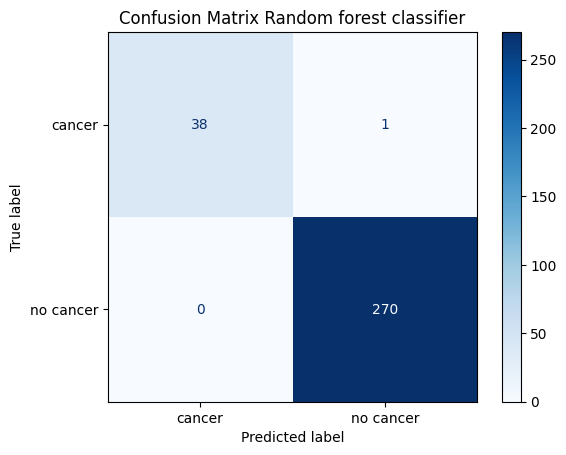

In [ ]:
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["cancer","no cancer"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Random forest classifier')
plt.show()